In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import string
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

In [5]:
df = pd.read_csv('data.csv')

In [6]:
x = df['Headline']
y = df['Label']
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [7]:
df.loc[df['Label']== 0, 'Label'] = 'REAL'
df.loc[df['Label']== 1, 'Label'] = 'FAKE'
df.columns
df['Label'].value_counts()

REAL    2137
FAKE    1872
Name: Label, dtype: int64

In [8]:
#Dropping the column URLs from the table
df.drop(['URLs'], axis = 1, inplace = True)
df.columns

Index(['Headline', 'Body', 'Label'], dtype='object')

In [9]:
df['Label'].value_counts()

REAL    2137
FAKE    1872
Name: Label, dtype: int64

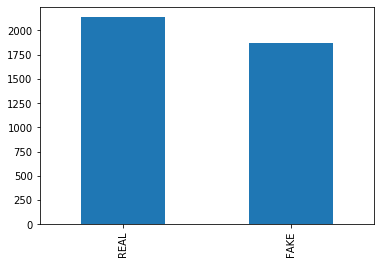

In [10]:
df['Label'].value_counts().plot(kind = 'bar')

In [11]:
df['headline_length'] = [len(str(a)) for a in df['Headline']]
df['headline_length'].describe()

count    4009.000000
mean       60.104016
std        22.660900
min         6.000000
25%        48.000000
50%        60.000000
75%        69.000000
max       653.000000
Name: headline_length, dtype: float64

In [16]:
df['body_length'] = [len(str(a)) for a in df['Body']]
df['body_length'].describe()

count     4009.000000
mean      2925.896982
std       3075.571005
min          3.000000
25%        515.000000
50%       2097.000000
75%       4296.000000
max      32767.000000
Name: body_length, dtype: float64

In [17]:
df.describe()

,headline_length,body_length
count,4009.000000,4009.000000
mean,60.104016,2925.896982
std,22.660900,3075.571005
min,6.000000,3.000000
25%,48.000000,515.000000
50%,60.000000,2097.000000
75%,69.000000,4296.000000
max,653.000000,32767.000000


In [18]:
df.shape

(4009, 5)

In [19]:
data = pd.DataFrame(data = data,columns=['Label','Body'])
data.head()

,Label,Body
0,1,Image copyright Getty Images\nOn Sunday mornin...
1,1,"LONDON (Reuters) - “Last Flag Flying”, a comed..."
2,1,The feud broke into public view last week when...
3,1,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4,1,"Country singer Jason Aldean, who was performin..."


In [20]:
data.isnull().any()

Label    False
Body      True
dtype: bool

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [23]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [24]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.28%


In [25]:
pipeline=Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                  ('nbmodel', MultinomialNB())])

In [26]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
score=pipeline.score(x_test, y_test)
print('accuracy', score)

accuracy 0.827930174563591


In [28]:
pred = pipeline.predict(x_test)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       429
           1       0.83      0.79      0.81       373

    accuracy                           0.83       802
   macro avg       0.83      0.83      0.83       802
weighted avg       0.83      0.83      0.83       802



In [30]:
print(confusion_matrix(y_test, pred))

[[371  58]
 [ 80 293]]


In [31]:
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

Accuracy with Multinomial Naive Bayes:   0.828


In [32]:
clf = RandomForestClassifier()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

C:\Users\viswe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy with RandomForestClassifier:   0.799


In [34]:
clf = GradientBoostingClassifier()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

Accuracy with RandomForestClassifier:   0.728
